In [1]:
import pandas as pd
import numpy as np
from rdkit import Chem

In [2]:
df=pd.read_table('similarity.txt')
col_names = df.columns.tolist()
df['']=col_names
df.set_index('',inplace=True)
df

,TPCN02029,TPCN02063,TPCN02186,TPCN02187,TPCN02188,TPCN02189,TPCN02190,TPCN02191,TPCN02192,TPCN02193,...,TPCN06374,TPCN06375,TPCN06376,TPCN06377,TPCN06378,TPCN06379,TPCN06380,TPCN06381,TPCN06382,TPCN06383
,,,,,,,,,,,,,,,,,,,,,
TPCN02029,1.000000,0.972163,0.572414,0.348377,0.478571,0.325383,0.418496,0.409478,0.456083,0.527223,...,0.390117,0.451793,0.529120,0.529120,0.380795,0.567050,0.458976,0.401587,0.434008,0.617674
TPCN02063,0.972163,1.000000,0.569126,0.351837,0.482732,0.322742,0.426305,0.413462,0.461588,0.527256,...,0.382166,0.455118,0.522533,0.522533,0.379479,0.573864,0.457600,0.407698,0.434158,0.628229
TPCN02186,0.572414,0.569126,1.000000,0.407072,0.475552,0.324301,0.417219,0.410412,0.420620,0.558525,...,0.369898,0.453535,0.501818,0.501818,0.351613,0.494545,0.466667,0.418066,0.433521,0.461925
TPCN02187,0.348377,0.351837,0.407072,1.000000,0.517780,0.304702,0.450431,0.438735,0.385267,0.433790,...,0.474227,0.475820,0.560910,0.560910,0.441149,0.374549,0.454624,0.450000,0.431779,0.386189
TPCN02188,0.478571,0.482732,0.475552,0.517780,1.000000,0.340301,0.493489,0.481061,0.446203,0.598891,...,0.456258,0.537007,0.580482,0.580482,0.450931,0.490700,0.492308,0.499586,0.538071,0.480929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TPCN06379,0.567050,0.573864,0.494545,0.374549,0.490700,0.347698,0.353675,0.387268,0.377510,0.518182,...,0.449165,0.520370,0.595442,0.595442,0.425287,1.000000,0.492151,0.449726,0.454296,0.560561
TPCN06380,0.458976,0.457600,0.466667,0.454624,0.492308,0.355693,0.417450,0.448101,0.430045,0.388147,...,0.474790,0.607493,0.615385,0.615385,0.502279,0.492151,1.000000,0.667622,0.613825,0.558477
TPCN06381,0.401587,0.407698,0.418066,0.450000,0.499586,0.359206,0.438839,0.464146,0.403464,0.355187,...,0.478510,0.662289,0.606711,0.606711,0.569350,0.449726,0.667622,1.000000,0.805876,0.522994


### Similarity between molecules

In [3]:
data=[]
for i in range(len(df)):
    for j in range(len(df)):
        # row
        row=df.index[i]
        # column
        columns=df.columns[j]
        if i>j:
            similarity=df.iloc[i,j]
            data.append((row,columns,similarity))
        else:
            pass

In [4]:
df_data=pd.DataFrame(data,columns=['row','columns','similarity'])
df_data.to_csv('row_columns_similarity.csv',index=False)
df_data

,row,columns,similarity
0,TPCN02063,TPCN02029,0.972163
1,TPCN02186,TPCN02029,0.572414
2,TPCN02186,TPCN02063,0.569126
3,TPCN02187,TPCN02029,0.348377
4,TPCN02187,TPCN02063,0.351837
...,...,...,...
20368148,TPCN06383,TPCN06378,0.434626
20368149,TPCN06383,TPCN06379,0.560561
20368150,TPCN06383,TPCN06380,0.558477
20368151,TPCN06383,TPCN06381,0.522994


### Compound pairs with similarity greater than 0.95

In [5]:
df_data_similarity_95 = df_data[(df_data['similarity']>=0.95)&(df_data['similarity']<=1)]
df_data_similarity_95 = df_data_similarity_95.sort_values(by='similarity', ascending=False)
df_data_similarity_95.reset_index(drop=True,inplace=True)
df_data_similarity_95

,row,columns,similarity
0,TPCN00472,TPCN00254,1.00
1,TPCN04331,TPCN04314,1.00
2,TPCN05419,TPCN05326,1.00
3,TPCN04331,TPCN04299,1.00
4,TPCN05689,TPCN05301,1.00
...,...,...,...
50973,TPCN06074,TPCN04613,0.95
50974,TPCN03825,TPCN03630,0.95
50975,TPCN04473,TPCN04201,0.95
50976,TPCN05094,TPCN05023,0.95


### Add content information for compound pairs

In [7]:
df_all=pd.read_csv('../0 data preparation/All.csv')
df_mol_mol_similarity=df_data_similarity_95
Row_Content=[]
Columns_Content=[]
Fold=[]
for i in range(len(df_mol_mol_similarity)):
    row=df_mol_mol_similarity['row'][i]
    row_content=max(df_all[df_all['ID']==row]['Content(%)'])
    columns=df_mol_mol_similarity['columns'][i]
    columns_content=max(df_all[df_all['ID']==columns]['Content(%)'])
    if row_content>columns_content:
        fold=row_content/columns_content
    else:
        fold=columns_content/row_content
    Fold.append(fold)
    Row_Content.append(row_content)
    Columns_Content.append(columns_content)
df_mol_mol_similarity['row_content']=Row_Content
df_mol_mol_similarity['columns_content']=Columns_Content
df_mol_mol_similarity['fold']=Fold
df_mol_mol_similarity

,row,columns,similarity,row_content,columns_content,fold
0,TPCN00472,TPCN00254,1.00,0.000236,0.000909,3.851695
1,TPCN04331,TPCN04314,1.00,0.006000,0.001800,3.333333
2,TPCN05419,TPCN05326,1.00,0.001200,0.004500,3.750000
3,TPCN04331,TPCN04299,1.00,0.006000,0.002000,3.000000
4,TPCN05689,TPCN05301,1.00,0.012454,0.006667,1.868007
...,...,...,...,...,...,...
50973,TPCN06074,TPCN04613,0.95,0.001250,0.000188,6.648936
50974,TPCN03825,TPCN03630,0.95,0.000544,0.001592,2.926471
50975,TPCN04473,TPCN04201,0.95,0.020250,0.015000,1.350000
50976,TPCN05094,TPCN05023,0.95,0.000500,0.001260,2.520000


### Sort by fold in descending order

In [8]:
df_mol_mol_similarity=df_mol_mol_similarity.sort_values(by=['fold'], ascending=False)
df_mol_mol_similarity.reset_index(drop=True,inplace=True)
df_mol_mol_similarity.to_csv('similarity95_fold.csv',index=False)
df_mol_mol_similarity

,row,columns,similarity,row_content,columns_content,fold
0,TPCN05893,TPCN05890,0.972758,1.500000,0.000009,166666.666667
1,TPCN03536,TPCN03222,0.967391,2.522321,0.000018,140128.944444
2,TPCN05893,TPCN05889,0.982798,1.500000,0.000011,136363.636364
3,TPCN05893,TPCN05888,0.972758,1.500000,0.000011,136363.636364
4,TPCN05891,TPCN04770,0.968041,3.744898,0.000033,113481.757576
...,...,...,...,...,...,...
50973,TPCN04865,TPCN04864,0.954545,0.019000,0.019000,1.000000
50974,TPCN04362,TPCN04361,0.971655,0.001148,0.001148,1.000000
50975,TPCN01877,TPCN01876,0.978700,0.000068,0.000068,1.000000
50976,TPCN02084,TPCN02083,0.978684,0.000003,0.000003,1.000000


### Plot

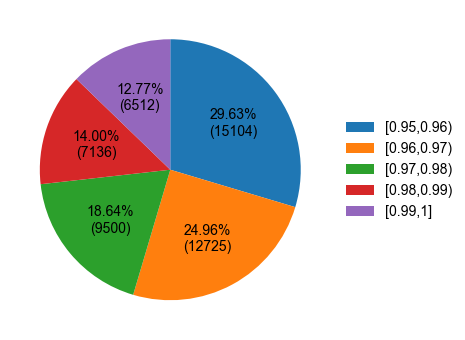

In [9]:
import matplotlib.pyplot as plt
types = ['[0.95,0.96)', '[0.96,0.97)', '[0.97,0.98)', '[0.98,0.99)', '[0.99,1]']
counts = [15105, 12725, 9500, 7136, 6512]
percentages = [29.63, 24.96, 18.64, 14.00, 12.77]
plt.figure(figsize=(8, 6))
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'Arial'
plt.pie(counts, labels=None, autopct=lambda pct: f"{pct:.2f}%\n({int(pct * sum(counts) / 100)})", counterclock=False, startangle=90)
legend = plt.legend(types, loc="center left", bbox_to_anchor=(1, 0.5))
legend.get_frame().set_linewidth(0.0)
plt.savefig('type.tif', dpi=600, bbox_inches='tight')
plt.show()